In [2]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'customer_booking.csv'

In [4]:
import chardet 
with open('customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [6]:
df = pd.read_csv(data, encoding='ISO-8859-1')

In [7]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


## Exploratory Data Analysis

In [8]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
# checking for missing values 
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
x = df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

## Mutual Information


In [21]:
X = df.drop('booking_complete', axis = 1)
y = df.booking_complete

#changing object dtype to int dtype

for colname in X.select_dtypes('object'):
  X[colname], _ = X[colname].factorize()

In [22]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [23]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
mi_scores = mi_scores.sort_values(ascending = False)

mi_scores # show a few features with their MI scores

route                    0.052788
booking_origin           0.048132
flight_duration          0.016537
wants_extra_baggage      0.009573
length_of_stay           0.008157
wants_preferred_seat     0.005449
wants_in_flight_meals    0.003870
num_passengers           0.002537
trip_type                0.001631
flight_hour              0.000440
flight_day               0.000387
sales_channel            0.000000
purchase_lead            0.000000
Name: MI Scores, dtype: float64

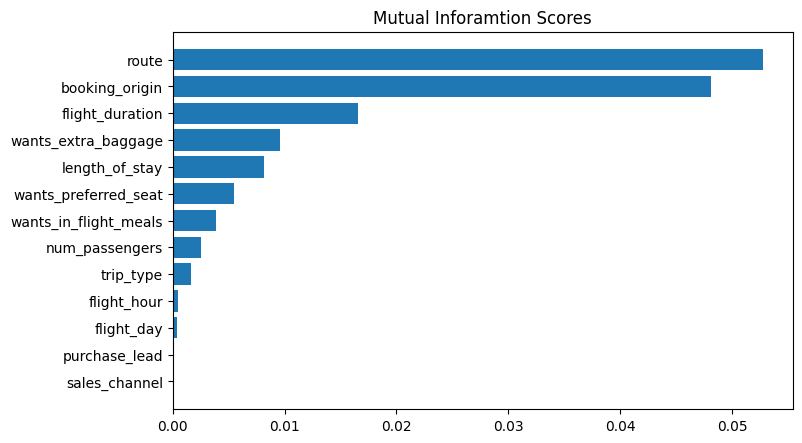

In [24]:
from string import ascii_letters
def plot_mi_scores (scores):
  scores = scores.sort_values(ascending = True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Inforamtion Scores')

plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

We can see that the top 5 features which are dependent with the booking_complete feature are:
1. route
2. booking_origin
3. flight_duration
4. wants_extra_baggage
5. length_of_stay



In [30]:
from IPython.lib.security import random
#test train split

from sklearn.model_selection import train_test_split

# dataset split 
# creating a function for dataset split
def dataset(X,y):
  train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=0)

# use the same function above for the validation set
  train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)
  return (train_X, val_X, train_y, val_y)

In [31]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
  scaler = MinMaxScaler()
  scaler.fit
  return X

# **Model 1: Random forest classifier with top 6 features**

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# assigning the features under a list

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
X = df[features]


In [34]:
# one hot encoding 
X = pd.get_dummies(X, columns=features)
X = scale(X)
y = df.booking_complete

X_train, X_val, y_train, y_val = dataset(X,y)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)* 100)
print('AUC score: ', roc_auc_score(y_val,preds))

Accuracy:  83.36
AUC score:  0.5657818407546988


#**Model 2 : Random forest classifier with all features**

In [ ]:
X = df.drop('booking_complete', axis =1)


In [35]:
from random import Random
# one hot encoding 
X = pd.get_dummies(X)
X = scale(X)
y = df.booking_complete

X_train, X_val, y_train, y_val= dataset(X,y)

forest_model = RandomForestClassifier(random_state = 1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_val)

print('ACCURACY: ', accuracy_score(y_val, preds) * 100)
print('AUC score: ', roc_auc_score(y_val, preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


# **Model 3 : XGB classifier with top 6 features**

In [36]:

from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))
     

ACCURACY:  84.78999999999999
AUC score:  0.5231540310747802


# **Model 4 : XGB classifier with all features**

In [37]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.96000000000001
AUC score:  0.5431644571912829


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models

Validating with test data set

In [38]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984
